In [1]:
import requests
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Extract

In [2]:
# Get data from API
api_dadosabertosurl = 'https://dadosabertos.camara.leg.br/api/v2/deputados'
resposta = requests.request("GET", api_dadosabertosurl, params={})
objetos = json.loads(resposta.text)
dados_df = pd.DataFrame(objetos['dados'])
# isolating useful data
dados_df = (dados_df[['id', 'nome', 'siglaPartido', "siglaUf"]])

# Transform

In [3]:
def obter_total_despesas(id_deputado):
    api_dadosabertos_despesas = ("https://dadosabertos.camara.leg.br/api/v2/deputados/{}/despesas?ordem=ASC&ordenarPor=ano".format(id_deputado))
    despesas_resposta = requests.get(api_dadosabertos_despesas)
    despesas = despesas_resposta.json()
    despesas_df = pd.DataFrame(despesas['dados'])
    if despesas_df.empty:
        return {'id': id_deputado, 'despesas': ''}
    else:
        total_despesas = despesas_df['valorDocumento'].sum()
        return {'id': id_deputado, 'despesas': total_despesas}

resultados = dados_df['id'].apply(obter_total_despesas)
total_despesas_df = pd.DataFrame(resultados.tolist())
## Need optimization

In [12]:
# Merge DataFrames
dados_df = dados_df.merge(total_despesas_df)
total_despesas_df

,id,despesas
0,220593,10418.17
1,204379,3860.63
2,220714,2000.0
3,221328,25128.27
4,204560,6427.18
...,...,...
508,220558,40477.87
509,204517,2832.39
510,160592,26253.82
511,220592,2606.49


[]

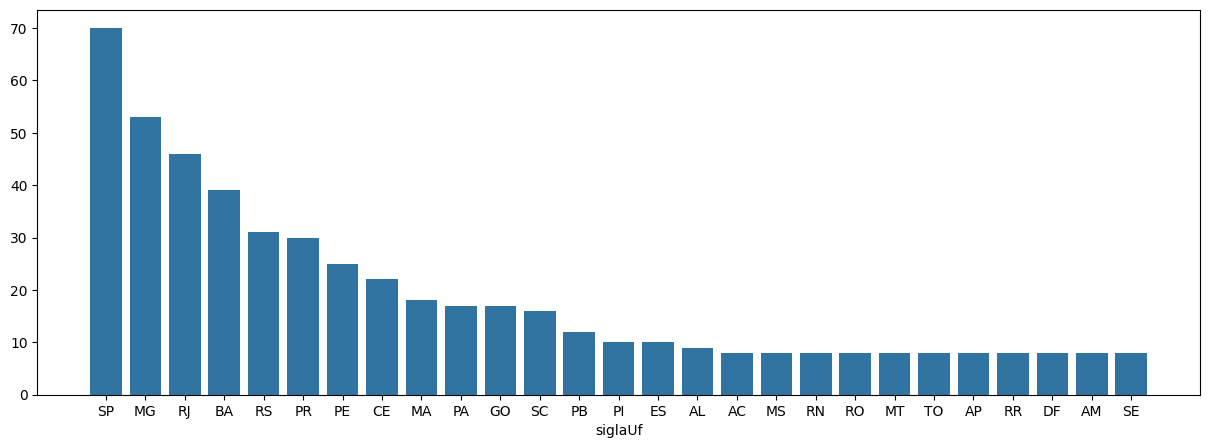

In [7]:
# Number of deputies by each Uf
x = dados_df['siglaUf'].value_counts().index
y = dados_df['siglaUf'].value_counts().values
plt.figure(figsize=(15,5))
sns.barplot(x=x, y=y)
plt.plot()

[]

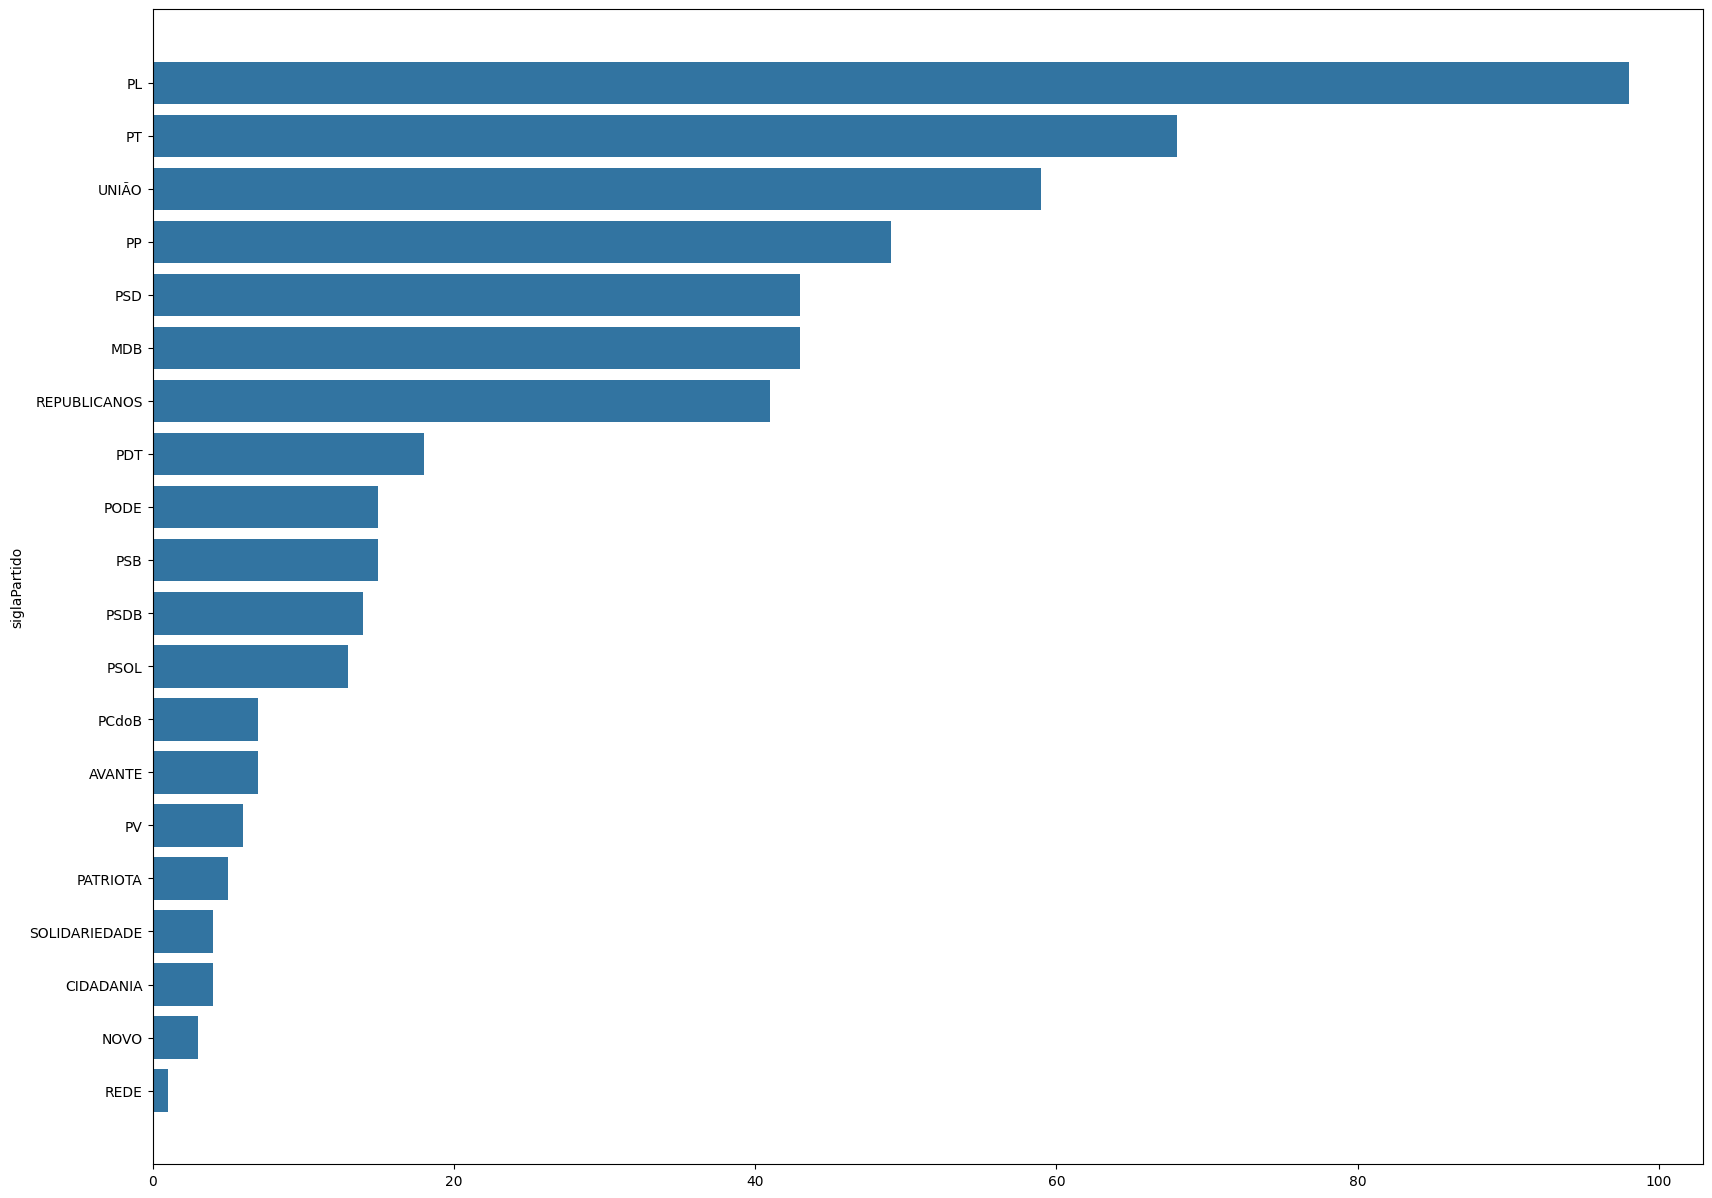

In [8]:
# Number of deputies by each party
x = dados_df['siglaPartido'].value_counts().values
y = dados_df['siglaPartido'].value_counts().index
plt.figure(figsize = (20, 15))
sns.barplot(x=x, y=y)
plt.plot()

In [27]:
# sorting by despesas
despesas_df = dados_df.sort_values(by=['despesas', 'nome'], ascending=False)
# Drop NaN values
despesas_df = despesas_df[despesas_df['despesas'] != '']
despesas_df = despesas_df.dropna()
despesas_df

,id,nome,siglaPartido,siglaUf,despesas
178,74454,Eunício Oliveira,MDB,CE,296276.88
213,74383,Giacobo,PL,PR,256966.0
223,204419,Glaustin da Fokus,PODE,GO,235662.6
432,153423,Renilce Nicodemos,MDB,PA,231928.52
469,74356,Silas Câmara,REPUBLICANOS,AM,221954.61
...,...,...,...,...,...
277,220640,Juliana Cardoso,PT,SP,1545.89
115,204367,Daniel Freitas,PL,SC,1322.31
74,178829,Capitão Augusto,PL,SP,1109.42
148,204450,Doutor Luizinho,PP,RJ,974.84


[]

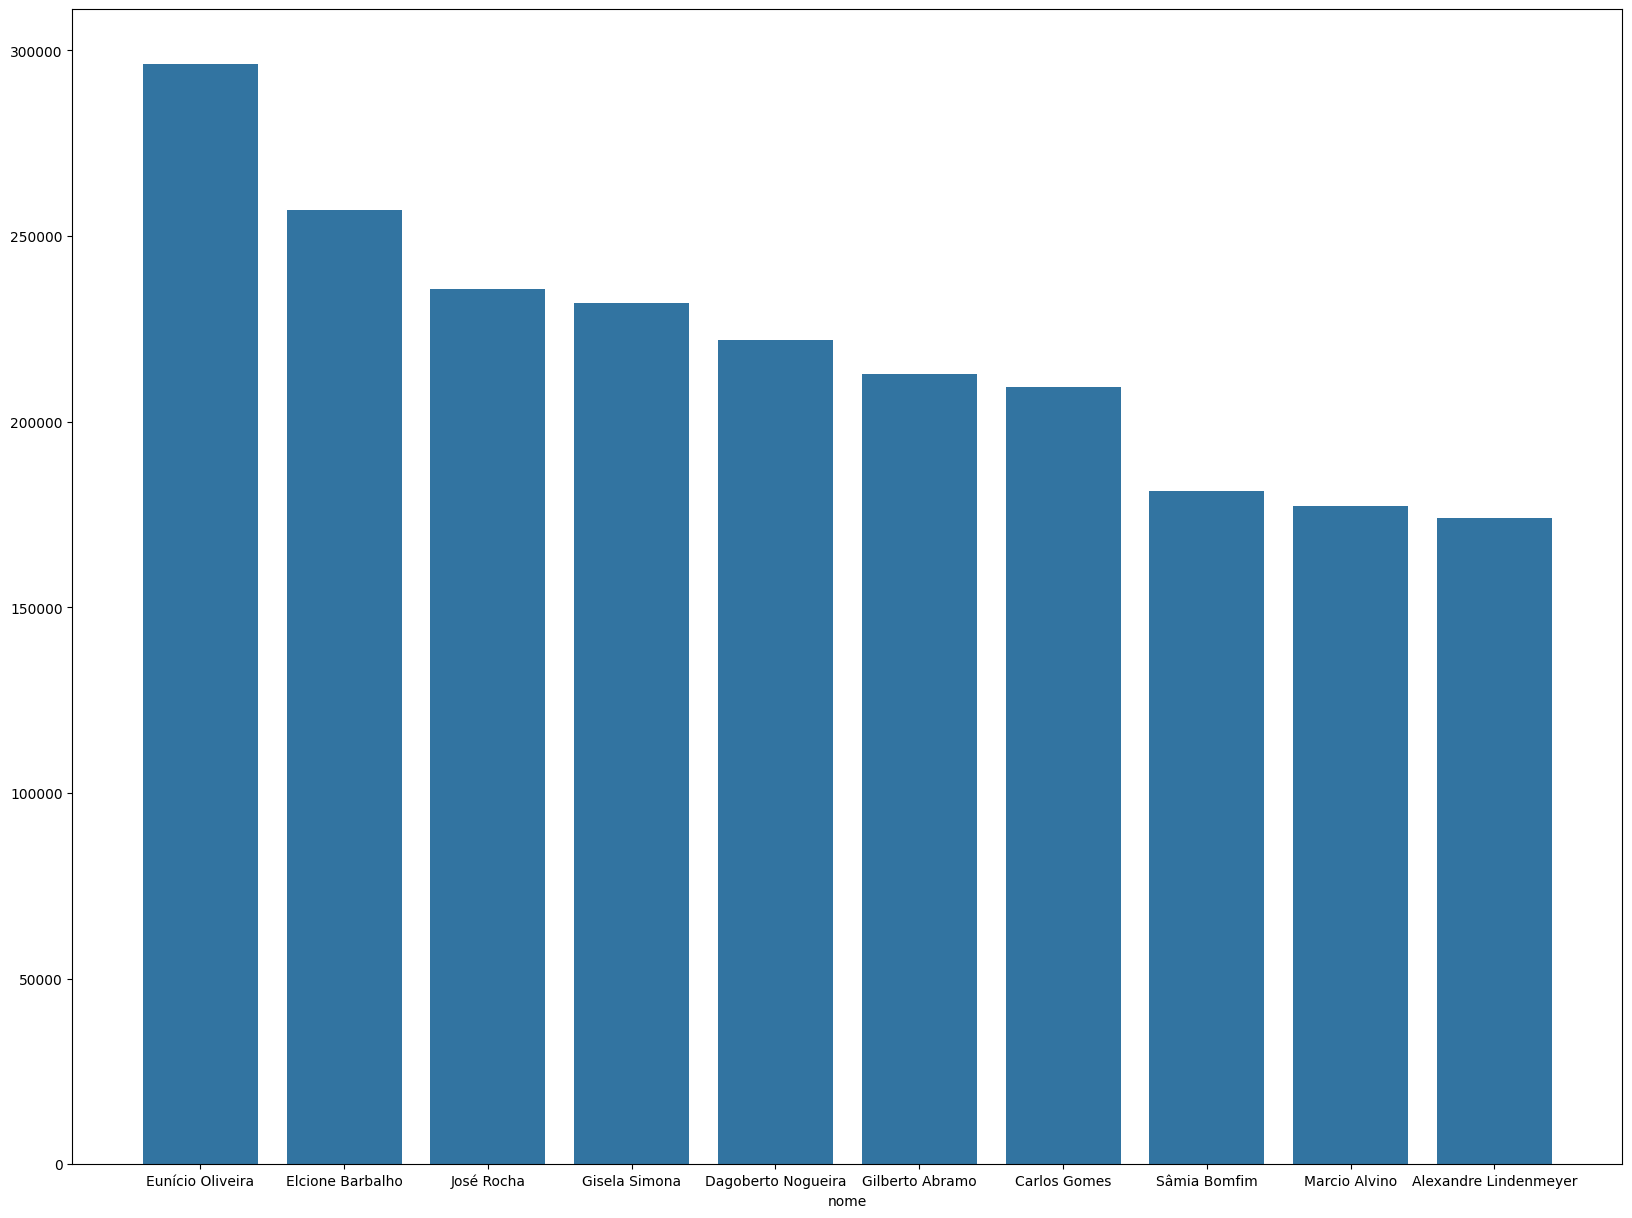

In [28]:
# Total spending per deputy
x = despesas_df['nome'].value_counts().head(10).index
y = despesas_df['despesas'].head(10).values
plt.figure(figsize = (20, 15))
sns.barplot(x=x, y=y)
plt.plot()